# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# import Data

In [3]:
data_df=pd.read_csv('/Users/Asus/Documents/Atmel Studio/Machine1.csv')

In [4]:
# Complete information about data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
# Shape
data_df.shape

(9568, 5)

In [6]:
# Data Exploration: Summarize Data
data_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
data_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [8]:
#dependent Variable
import math
median_PE = math.floor(data_df.PE.median())
median_PE

451

In [9]:
data_df.fillna(median_PE)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


# Define X & Y

In [10]:
x=data_df.drop(['PE'],axis=1).values
y=data_df['PE'].values

In [11]:
print((x))

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [12]:
print((y))


[480.48 445.75 438.76 ... 465.96 450.93 451.67]


# Split the dataset in training Set & test Set

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the Model on the Training Set


In [14]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [15]:
reg= linear_model.LinearRegression()
reg.fit(data_df[['AT','V','AP','RH']],data_df.PE)

LinearRegression()

In [16]:
reg.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [17]:
reg.intercept_

454.6092743153102

# Predict the Test set Results

In [18]:
y_pred=ml.predict(x_test)
print(y_pred)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


In [19]:
ml.predict([[8.34,40.77,1010.84,90.01]])

array([477.12419199])

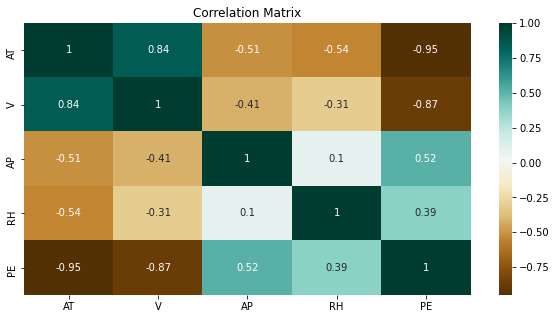

In [20]:
# Correlation Heatmap
plt.figure(figsize = (10, 5))
c = data_df.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

# Evaluate the Model


In [21]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.9289374661293962

# Plot the Results

Text(0.5, 1.0, 'Actual Vs. Predicted')

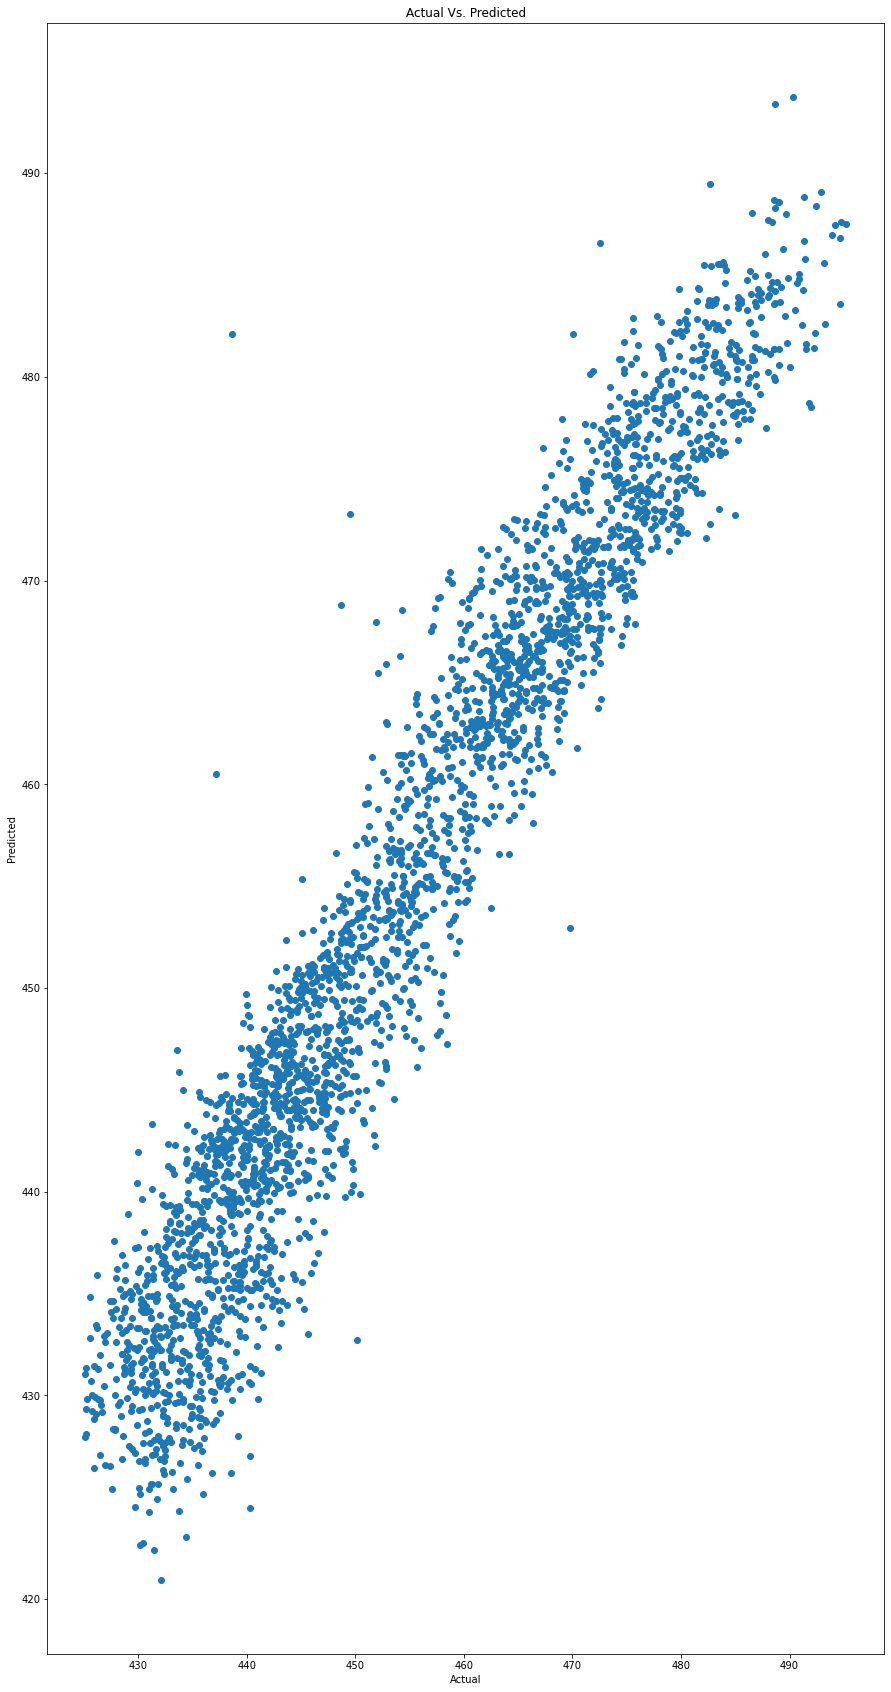

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,30))
plt.scatter(y_test,y_pred)
myline = np.linspace(0, 10, 100)
#plt.plot(myline, my_model(myline), color ="r")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')

# Predicted Values

In [23]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Differance':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Differance
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
5,438.00,440.810771,-2.810771
6,484.31,482.716625,1.593375
7,464.18,462.222261,1.957739
8,452.53,451.261034,1.268966
9,445.54,445.431174,0.108826


In [27]:
from numpy import genfromtxt
x1=data_df.drop(['PE'],axis=1).values
y1=data_df['PE'].values
print(x1[0:10])
print(y1[0:10])

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 [  19.07   49.69 1007.22   76.79]
 [  11.8    40.66 1017.13   97.2 ]
 [  13.97   39.16 1016.05   84.6 ]
 [  22.1    71.29 1008.2    75.38]
 [  14.47   41.76 1021.98   78.41]
 [  31.25   69.51 1010.25   36.83]
 [   6.77   38.18 1017.8    81.13]]
[480.48 445.75 438.76 453.09 464.43 470.96 442.35 464.   428.77 484.31]


In [33]:
def gradient(x1,y1,alpha,epoch):
  m=x1.shape[0]  #number of samples
  ones = np.ones((m,1))
  x1=np.concatenate((ones,x1),axis=1)
  n=x1.shape[1]
  Theta = np.ones(n) #n = 5th parameter
  h = np.dot(x1, Theta) #Compute Hypothesis

  #Gradient descent Algorithm
  cost = np.ones(epoch)
  for i in range (0,epoch):
      Theta[0] = Theta[0] - (alpha/ x1.shape[0]) * sum(h-y1)
      for j in range(1,n):
        Theta[j] = Theta[j] - (alpha/ x1.shape[0]) * sum((h-y1) * x1[:, j])
      h = np.dot(x1,Theta)
      cost[i] = 1/(2*m) * sum(np.square(h-y1)) #compute Cost
  return cost, Theta 

In [38]:
#Calcualting Theta & Cost
cost, Theta = gradient(x1, y1, 0.01, 5000)
print(Theta)

<ipython-input-33-9b7e861e7158>:16: RuntimeWarning: overflow encountered in square
  cost[i] = 1/(2*m) * sum(np.square(h-y1)) #compute Cost
<ipython-input-33-9b7e861e7158>:14: RuntimeWarning: overflow encountered in double_scalars
  Theta[j] = Theta[j] - (alpha/ x1.shape[0]) * sum((h-y1) * x1[:, j])
<ipython-input-33-9b7e861e7158>:14: RuntimeWarning: invalid value encountered in double_scalars
  Theta[j] = Theta[j] - (alpha/ x1.shape[0]) * sum((h-y1) * x1[:, j])


[nan nan nan nan nan]


Lowest Cost =nan
Cost after 1000 iterations =nan


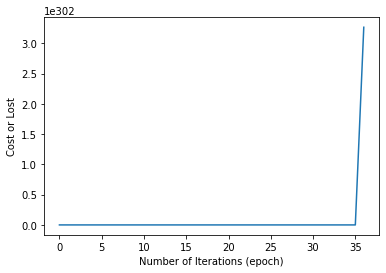

In [39]:
plt.plot(cost)
plt.xlabel('Number of Iterations (epoch)')
plt.ylabel("Cost or Lost")
plt.show
print("Lowest Cost ="+ str(np.min(cost)))
print("Cost after 1000 iterations =" + str(cost[-1]))